In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline


In [2]:
mall_df=pd.read_csv(r'C:\Users\chois\Downloads\archive (1)\Mall_Customers.csv')

In [3]:
mall_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = mall_df[['Age', 'Annual Income (k$)']]

In [5]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(X)

C:\Users\chois\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [6]:
mall_df['kmeans_label']=kmeans.labels_

In [7]:
unique_labels= np.unique(kmeans.labels_)

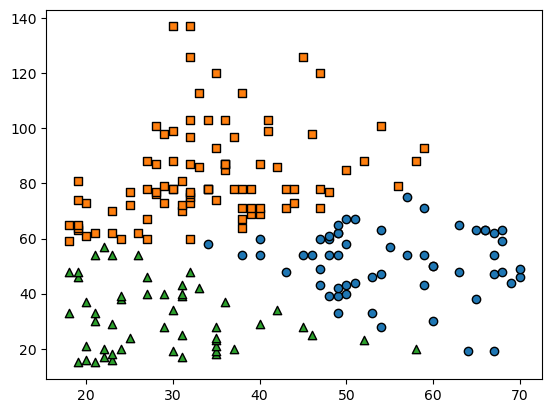

In [8]:
markers=['o','s','^','P','D','H','x']

for label in unique_labels:
    label_cluster = mall_df[mall_df['kmeans_label']==label]
    plt.scatter(x=label_cluster['Age'], y=label_cluster['Annual Income (k$)'], edgecolor='k', 
                marker=markers[label])

plt.show()

In [9]:
mall_df.groupby('kmeans_label')['Spending Score (1-100)'].mean()

kmeans_label
0    43.258621
1    51.219780
2    56.274510
Name: Spending Score (1-100), dtype: float64

In [10]:
mall_df['Gender'] = mall_df['Gender'].map({'Male': 0, 'Female': 1})

In [11]:
kmeans.fit(mall_df)

C:\Users\chois\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [12]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_transformed = pca.fit_transform(mall_df)

mall_df['pca_x'] = pca_transformed[:,0]
mall_df['pca_y'] = pca_transformed[:,1]
mall_df.head(3)

#근데 말이야 이렇게 하면 CustomerID도 같이 포함되어서 축소되는거 아님???? 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_label,pca_x,pca_y
0,1,0,19,15,39,2,-109.386489,-5.471268
1,2,0,21,15,81,2,-108.205535,34.936787
2,3,1,20,16,6,2,-107.378735,-37.832118


In [13]:
mall_df['kmeans_label1']=kmeans.labels_

In [14]:
mall_df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_label,pca_x,pca_y,kmeans_label1
0,1,0,19,15,39,2,-109.386489,-5.471268,1
1,2,0,21,15,81,2,-108.205535,34.936787,1
2,3,1,20,16,6,2,-107.378735,-37.832118,1


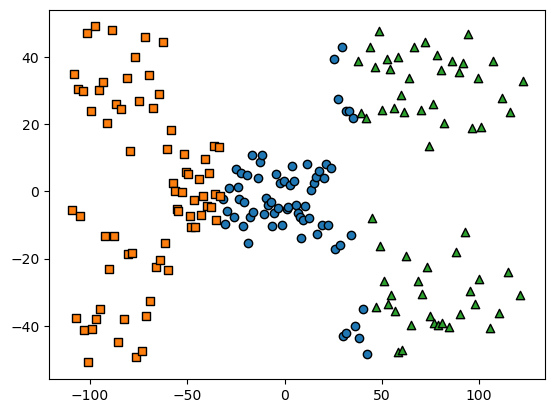

In [15]:
unique_labels1= np.unique(kmeans.labels_)
for label in unique_labels1:
    label_cluster = mall_df[mall_df['kmeans_label1']==label]
    plt.scatter(x=label_cluster['pca_x'], y=label_cluster['pca_y'], edgecolor='k', 
                marker=markers[label])

plt.show()

7장02 실습 
Annual Income (k$), Spending Score (1-100)을 가지고 kmean을 할 때 몇 군집으로 나누는게 좋은지 판단하였음. 5개로 결론남. 

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

In [17]:
X1 = mall_df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [18]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(X1)

C:\Users\chois\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [19]:
mall_df['cluster']=kmeans.labels_

In [20]:
score_samples = silhouette_samples(X1, mall_df['cluster'])

In [21]:
mall_df['silhouette_coeff'] = score_samples

In [22]:
average_score = silhouette_score(X1, mall_df['cluster'])
print(average_score)

0.46761358158775435


In [23]:
mall_df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),kmeans_label,pca_x,pca_y,kmeans_label1,cluster,silhouette_coeff
0,1,0,19,15,39,2,-109.386489,-5.471268,1,0,0.488530
1,2,0,21,15,81,2,-108.205535,34.936787,1,0,0.352119
2,3,1,20,16,6,2,-107.378735,-37.832118,1,0,0.245515


In [24]:
mall_df.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.399845
1    0.591748
2    0.559567
Name: silhouette_coeff, dtype: float64

In [25]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(X1)
mall_df['cluster1']=kmeans.labels_
score_samples1 = silhouette_samples(X1, mall_df['cluster1'])
mall_df['silhouette_coeff1'] = score_samples1
average_score1 = silhouette_score(X1, mall_df['cluster1'])
print(average_score1)
mall_df.groupby('cluster1')['silhouette_coeff1'].mean()

0.3848654187182249


C:\Users\chois\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


cluster1
0    0.366275
1    0.445384
Name: silhouette_coeff1, dtype: float64

In [26]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(X1)
mall_df['cluster2']=kmeans.labels_
score_samples2 = silhouette_samples(X1, mall_df['cluster2'])
mall_df['silhouette_coeff2'] = score_samples2
average_score2 = silhouette_score(X1, mall_df['cluster2'])
print(average_score2)
mall_df.groupby('cluster2')['silhouette_coeff2'].mean()

0.4931963109249047


C:\Users\chois\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


cluster2
0    0.443268
1    0.540222
2    0.539077
3    0.554734
Name: silhouette_coeff2, dtype: float64

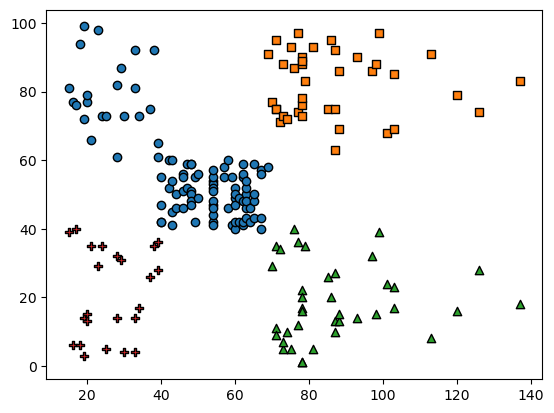

In [28]:
unique_labels= np.unique(kmeans.labels_)
markers=['o','s','^','P','D','H','x']

for label in unique_labels:
    label_cluster = mall_df[mall_df['cluster2']==label]
    plt.scatter(x=label_cluster['Annual Income (k$)'], y=label_cluster['Spending Score (1-100)'], edgecolor='k', 
                marker=markers[label])

plt.show()

In [29]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(X1)
mall_df['cluster3']=kmeans.labels_
score_samples3 = silhouette_samples(X1, mall_df['cluster3'])
mall_df['silhouette_coeff3'] = score_samples3
average_score3 = silhouette_score(X1, mall_df['cluster3'])
print(average_score3)
mall_df.groupby('cluster3')['silhouette_coeff3'].mean()

0.553931997444648


C:\Users\chois\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


cluster3
0    0.596651
1    0.509171
2    0.503987
3    0.512268
4    0.599013
Name: silhouette_coeff3, dtype: float64

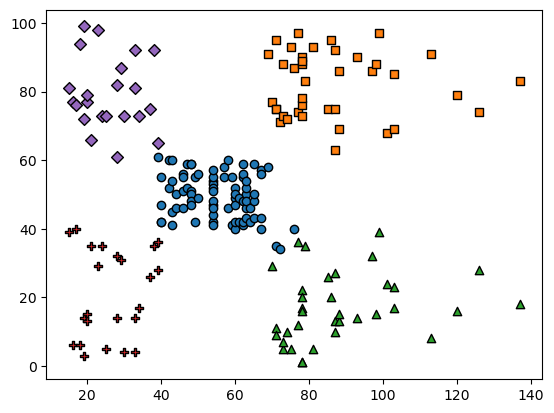

In [30]:
unique_labels= np.unique(kmeans.labels_)
markers=['o','s','^','P','D','H','x']

for label in unique_labels:
    label_cluster = mall_df[mall_df['cluster3']==label]
    plt.scatter(x=label_cluster['Annual Income (k$)'], y=label_cluster['Spending Score (1-100)'], edgecolor='k', 
                marker=markers[label])

plt.show()

In [31]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(X1)
mall_df['cluster4']=kmeans.labels_
score_samples4 = silhouette_samples(X1, mall_df['cluster4'])
mall_df['silhouette_coeff4'] = score_samples4
average_score4 = silhouette_score(X1, mall_df['cluster4'])
print(average_score4)
mall_df.groupby('cluster4')['silhouette_coeff4'].mean()

0.45705720010448403


C:\Users\chois\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


cluster4
0    0.391097
1    0.480670
2    0.488138
3    0.493937
4    0.409027
5    0.577821
Name: silhouette_coeff4, dtype: float64